In [1]:
from matplotlib import pyplot as plt
import numpy as np
from time import time
from os.path import abspath, join
import sys
from glob import glob
import vaex
from hammer import dddm
root_dir = abspath(join('..', '..'))
data_dir = join(root_dir, 'Data')
sys.path.append(root_dir)
from utils import (plot_corner, plot_chain, plot_fit, style, calculate_probs, get_params)

# 2 comp

In [2]:
style()

In [3]:
zfiles = glob(join(root_dir, 'Data', 'Effective-Volume', 'z*.hdf5'))
zfiles.sort()
wfiles = glob(join(root_dir, 'Data', 'Velocity-Distribution', 'w*.hdf5'))
wfiles.sort()
zfiles, wfiles

(['/home2/s20321005/Thesis-Project/Data/Effective-Volume/z_(-0.10)_(0.10).hdf5',
  '/home2/s20321005/Thesis-Project/Data/Effective-Volume/z_(0.10)_(0.16).hdf5',
  '/home2/s20321005/Thesis-Project/Data/Effective-Volume/z_(0.16)_(0.20).hdf5',
  '/home2/s20321005/Thesis-Project/Data/Effective-Volume/z_(0.20)_(0.23).hdf5',
  '/home2/s20321005/Thesis-Project/Data/Effective-Volume/z_(0.23)_(0.26).hdf5',
  '/home2/s20321005/Thesis-Project/Data/Effective-Volume/z_(0.26)_(0.28).hdf5',
  '/home2/s20321005/Thesis-Project/Data/Effective-Volume/z_(0.28)_(0.30).hdf5',
  '/home2/s20321005/Thesis-Project/Data/Effective-Volume/z_(0.30)_(0.32).hdf5',
  '/home2/s20321005/Thesis-Project/Data/Effective-Volume/z_(0.32)_(0.34).hdf5',
  '/home2/s20321005/Thesis-Project/Data/Effective-Volume/z_(0.34)_(0.36).hdf5',
  '/home2/s20321005/Thesis-Project/Data/Effective-Volume/z_(0.36)_(0.37).hdf5',
  '/home2/s20321005/Thesis-Project/Data/Effective-Volume/z_(0.37)_(0.39).hdf5',
  '/home2/s20321005/Thesis-Project/Data

In [4]:
index = 0
zfile = zfiles[index]
wfile = wfiles[index]
zdata = vaex.open(zfile)
zmid = zdata['zmid'].to_numpy()
znum = zdata['znum'].to_numpy()
zerr = zdata['zerr'].to_numpy()

wdata = vaex.open(wfile)
wmid = wdata['wmid'].to_numpy()
wnum = wdata['wnum'].to_numpy()
werr = wdata['werr'].to_numpy()

zdata = (zmid, znum, zerr)
wdata = (wmid, wnum, werr)

In [15]:
rhob = [
    0.0104, 0.0277, 0.0073, 0.0005, 0.0006, 0.0018,
    0.0018, 0.0029, 0.0072, 0.0216, 0.0056, 0.0015
]
sigmaz = [
    3.7, 7.1, 22.1, 39.0, 15.5, 7.5, 12.0, 
    18.0, 18.5, 18.5, 20.0, 20.0]
rhoDM = [0.016]
sigmaDD = [7]
log_hDD = [np.log(30)]
log_nu0 = [0]
R = [3.4E-3]
zsun = [30]
w0 = [-7.]
log_sigmaw1 = [np.log(5.)]
log_a1 = [np.log(.8)]
log_sigmaw2 = [np.log(10.)]
log_a2 = [np.log(0.2)]

theta = np.array([rhob + sigmaz + rhoDM + sigmaDD + log_hDD + log_nu0 + R + zsun+w0 + log_sigmaw1 + log_a1 + log_sigmaw2 + log_a2]).flatten()
theta.shape

(35,)

In [8]:
locs = dict(
    rhoDM=-0.05,
    sigmaDD=0.1,
    log_hDD=np.log(1),
    log_nu0=-1,
    R=3.4E-3,
    zsun=-50,
    w0=-15,
    log_sigmaw1=np.log(1),
    log_a1=np.log(0.05),
    log_sigmaw2=np.log(1),
    log_a2=np.log(0.05),
)

scales = dict(
    rhoDM=0.15,
    sigmaDD=30,
    log_hDD=np.log(100)-locs['log_hDD'],
    log_nu0=3,
    R=0.6E-3,
    zsun=100,
    w0=15,
    log_sigmaw1=np.log(25)-locs['log_sigmaw1'],
    log_a1=np.log(2)-locs['log_a1'],
    log_sigmaw2=np.log(25)-locs['log_sigmaw2'],
    log_a2=np.log(2)-locs['log_a2'],
)

keys = list(locs.keys())
locs = np.array(list(locs.values()))
scales = np.array(list(scales.values()))

[(k, loc, th, s+loc) for k, loc, th, s in zip(keys, locs, theta[24:], scales)]

[('rhoDM', -0.05, 0.016, 0.09999999999999999),
 ('sigmaDD', 0.1, 7.0, 30.1),
 ('log_hDD', 0.0, 3.4011973816621555, 4.605170185988092),
 ('log_nu0', -1.0, 1.0, 2.0),
 ('R', 0.0034, 0.0034, 0.004),
 ('zsun', -50.0, 30.0, 50.0),
 ('w0', -15.0, -7.0, 0.0),
 ('log_sigmaw1', 0.0, 1.6094379124341003, 3.2188758248682006),
 ('log_a1', -2.995732273553991, -0.2231435513142097, 0.6931471805599454),
 ('log_sigmaw2', 0.0, 2.302585092994046, 3.2188758248682006),
 ('log_a2', -2.995732273553991, -1.6094379124341003, 0.6931471805599454)]

In [9]:
ndim = len(locs)+24
nwalkers = 2*ndim+2
ndim, nwalkers

(35, 72)

In [10]:
p0 = dddm.generate_p0(nwalkers, locs, scales, kind=2)
p0.shape

(72, 35)

In [11]:
for p in p0:
    print(dddm.log_prob(p, zdata, wdata, locs, scales))

(42.392964208288134, -8160.197118833733)
(34.24651765591038, -1109.6619882700606)
(32.27977036547947, -647.8082766748486)
(34.187988757192045, -307.1462914842866)
(41.127483400979585, -1183.3019563963294)
(38.01943676503296, -7808.036329468089)
(31.901991034218472, -3707.8261921176518)
(43.77770732714977, -1201.2776791490635)
(41.84081291438469, -64.5267680033148)
(44.78129618656002, -6747.734650256198)
(40.68368096319102, -1476.1918312259927)
(38.1242876159367, -1216.6030219062966)
(36.74192614691973, -781.0617922484106)
(36.00932664873907, -2585.4412944506066)
(43.35037908463717, -5972.653870335994)
(39.45839636186616, -259.5457821512065)
(40.233225523888585, -710.7339782277003)
(38.856490183332774, -2627.239218026257)
(30.41365531377575, -4041.5221459740947)
(41.38298600772797, -477.6927001165755)
(37.284981699642, -12932.468950357075)
(40.590170921724344, -4002.946853676311)
(39.751497944428344, -3261.2521184633706)
(40.205771227647176, -2610.333896673973)
(32.64772829920673, -120.

In [13]:
p0_flat = p0.reshape(-1, ndim)
dddm.log_prob_par(p0_flat, zdata, wdata, locs, scales)

array([[ 4.23929642e+01, -8.20259008e+03, -8.16019712e+03],
       [ 3.42465177e+01, -1.14390851e+03, -1.10966199e+03],
       [ 3.22797704e+01, -6.80088047e+02, -6.47808277e+02],
       [ 3.41879888e+01, -3.41334280e+02, -3.07146291e+02],
       [ 4.11274834e+01, -1.22442944e+03, -1.18330196e+03],
       [ 3.80194368e+01, -7.84605577e+03, -7.80803633e+03],
       [ 3.19019910e+01, -3.73972818e+03, -3.70782619e+03],
       [ 4.37777073e+01, -1.24505539e+03, -1.20127768e+03],
       [ 4.18408129e+01, -1.06367581e+02, -6.45267680e+01],
       [ 4.47812962e+01, -6.79251595e+03, -6.74773465e+03],
       [ 4.06836810e+01, -1.51687551e+03, -1.47619183e+03],
       [ 3.81242876e+01, -1.25472731e+03, -1.21660302e+03],
       [ 3.67419261e+01, -8.17803718e+02, -7.81061792e+02],
       [ 3.60093266e+01, -2.62145062e+03, -2.58544129e+03],
       [ 4.33503791e+01, -6.01600425e+03, -5.97265387e+03],
       [ 3.94583964e+01, -2.99004179e+02, -2.59545782e+02],
       [ 4.02332255e+01, -7.50967204e+02

(35,)


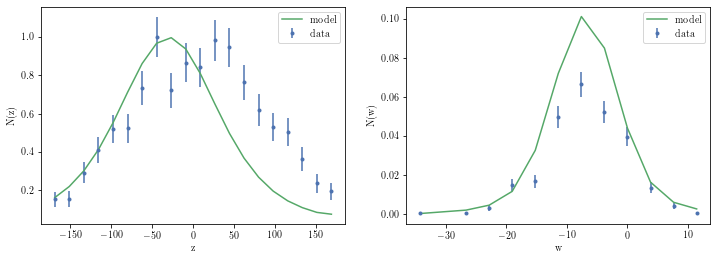

(51.60009219664631, 2.6430004202013677)

In [16]:
print(theta.shape)
zmod = dddm.fz(zmid, theta)
wmod = dddm.fw(wmid, theta)

# plot
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].errorbar(zmid, znum, yerr=zerr, fmt='.', label='data')
ax[0].plot(zmid, zmod, label='model')
ax[0].set_xlabel('z')
ax[0].set_ylabel('N(z)')
ax[0].legend()
ax[1].errorbar(wmid, wnum, yerr=werr, fmt='.', label='data')
ax[1].plot(wmid, wmod, label='model')
ax[1].set_xlabel('w')
ax[1].set_ylabel('N(w)')
ax[1].legend()
plt.show()
dddm.log_prob(theta, zdata, wdata, locs, scales)

In [17]:
t0 = time()
chain = dddm.mcmc(500, nwalkers, p0, zdata, wdata, locs, scales, dz=1, verbose=True, parallel=True)
print(time() - t0, "s")
chain.shape

4.5567896366119385 s


(500, 72, 35)

In [18]:
calculate_probs(dddm, chain, ndim, zdata, wdata, locs, scales, batch=100)

array([[   44.11472991, -7224.27143465, -7180.15670475],
       [   34.24651766, -1143.90850593, -1109.66198827],
       [   32.27977037,  -680.08804704,  -647.80827667],
       ...,
       [   41.05818943,    71.44855038,   112.50673981],
       [   45.00071463,    74.54155002,   119.54226465],
       [   41.09630585,    79.25520984,   120.35151569]])

100%|██████████| 12/12 [00:00<00:00, 22.34it/s]


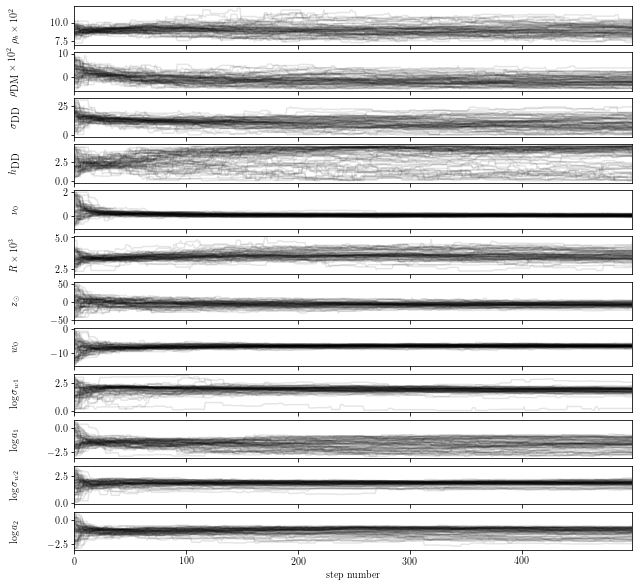

In [19]:
labels = [r'$\rho_b\times 10^2$', r'$\rho_{\textup{DM}}\times 10^2$', r"$\sigma_{\textup{DD}}$", r"$h_{\textup{DD}}$", r'$\nu_0$', r'$R\times 10^3$', r'$z_{\odot}$', r'$w_0$', r'$\log \sigma_{w1}$', r'$\log a_1$', r'$\log \sigma_{w2}$', r'$\log a_2$']
labs = ['rhob', 'rhoDM', 'sigmaDD', 'hDD', 'nu0', 'R', 'zsun', 'w0', 'log_sigmaw1', 'log_a1', 'log_sigmaw2', 'log_a2']
indexes = [12, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]

params = get_params(chain, indexes, labs)
plot_chain(params, labels, figsize=(10,10))

In [20]:
p0_next = chain[-1, :, :]
t0 = time()
chain = dddm.mcmc(2000, nwalkers, p0_next, zdata, wdata, locs, scales, dz=1, verbose=True, parallel=True)
print(time() - t0, "s")
chain.shape

39.23518776893616 s


(2000, 72, 35)

100%|██████████| 12/12 [00:00<00:00, 18.86it/s]


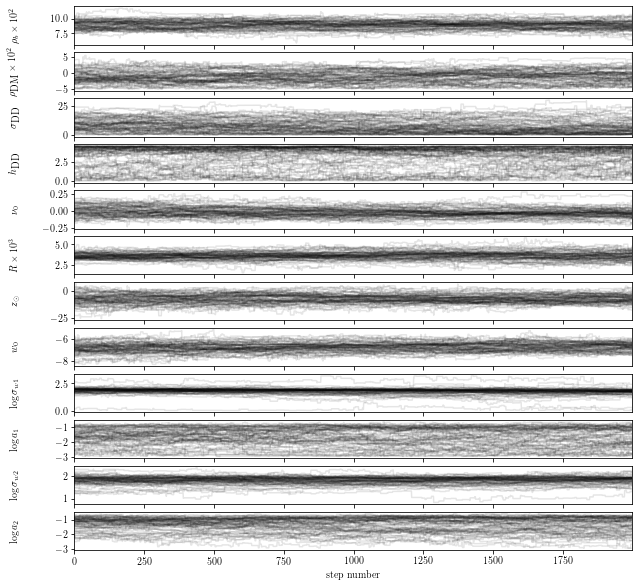

In [21]:
labels = [r'$\rho_b\times 10^2$', r'$\rho_{\textup{DM}}\times 10^2$', r"$\sigma_{\textup{DD}}$", r"$h_{\textup{DD}}$", r'$\nu_0$', r'$R\times 10^3$', r'$z_{\odot}$', r'$w_0$', r'$\log \sigma_{w1}$', r'$\log a_1$', r'$\log \sigma_{w2}$', r'$\log a_2$']
labs = ['rhob', 'rhoDM', 'sigmaDD', 'hDD', 'nu0', 'R', 'zsun', 'w0', 'log_sigmaw1', 'log_a1', 'log_sigmaw2', 'log_a2']
indexes = [12, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]

params = get_params(chain, indexes, labs)
plot_chain(params, labels, figsize=(10,10))

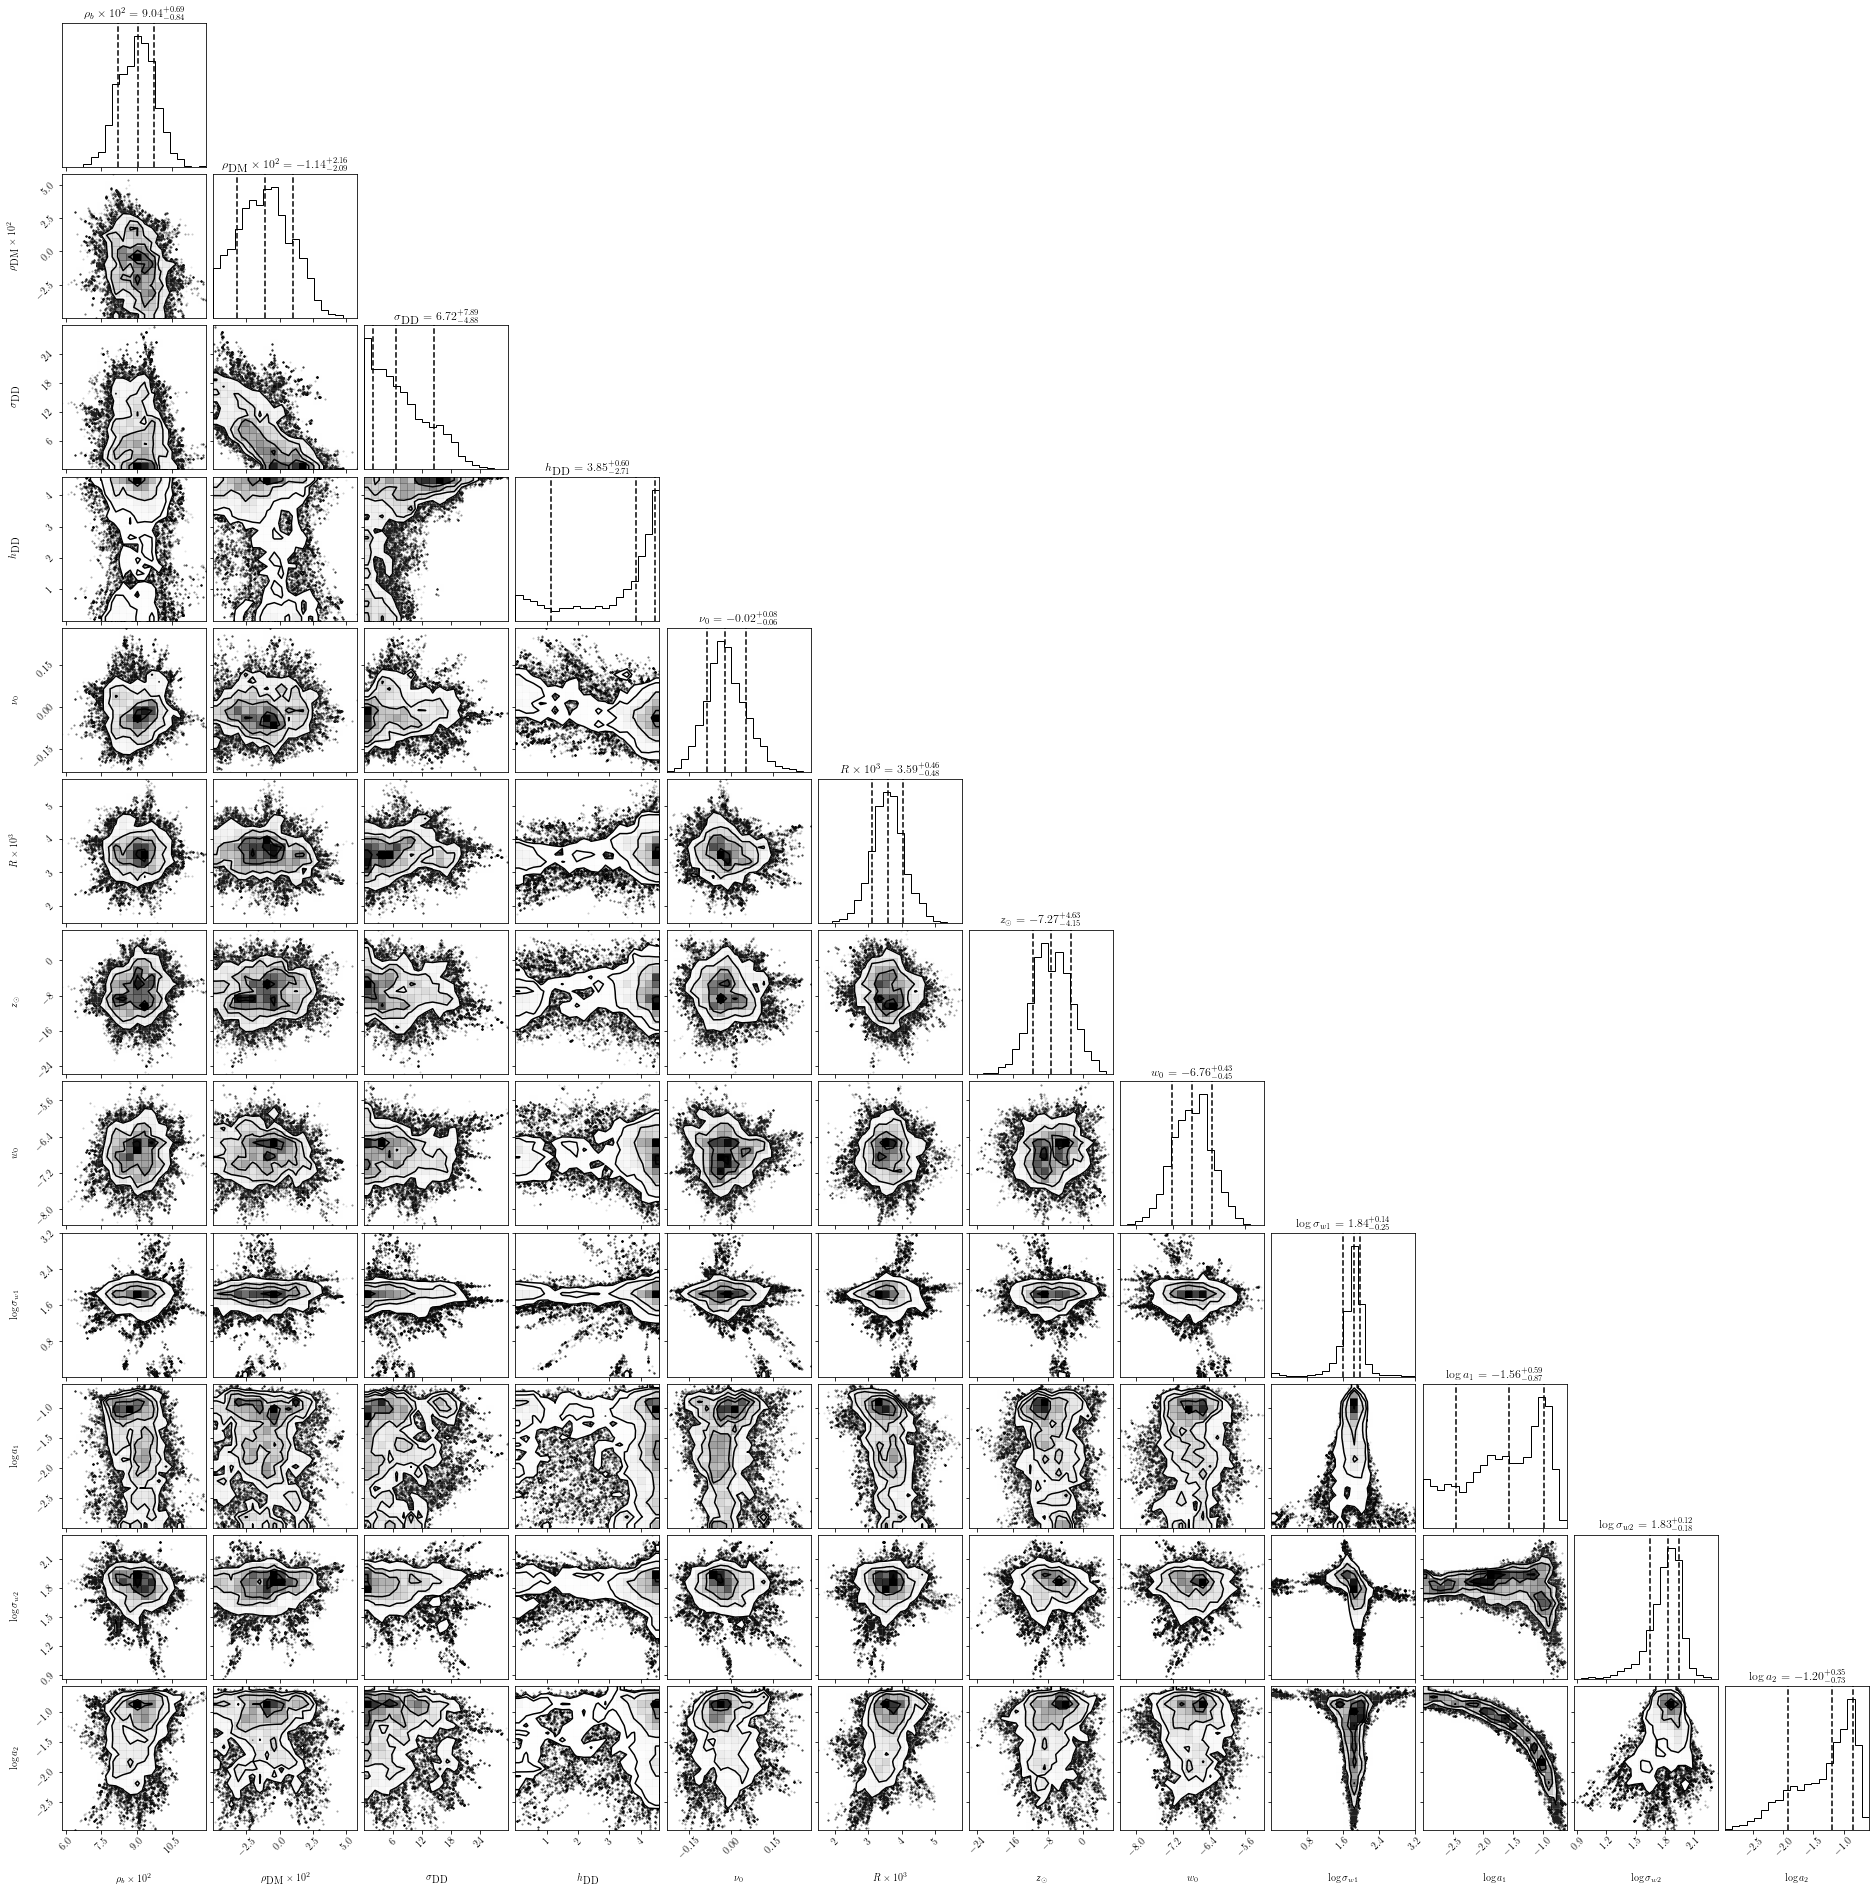

In [22]:
plot_corner(params, labels)

(144000, 35)


100%|██████████| 50000/50000 [01:02<00:00, 805.09it/s]


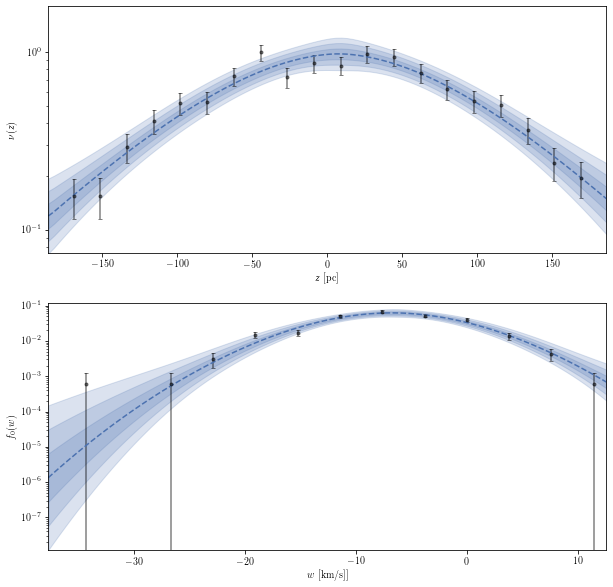

In [23]:
plot_fit(dddm, zdata, wdata, chain, ndim)

In [24]:
probs = calculate_probs(dddm, chain, ndim, zdata, wdata, locs, scales)

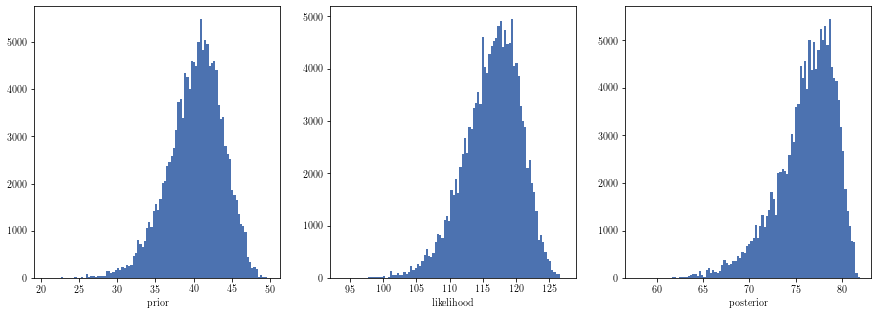

127.28234144201754

In [25]:
prior = probs[:, 0]
likelihood = probs[:, 2]
posterior = probs[:, 1]
# plot histogram of probabilities
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].hist(prior, bins=100)
axes[0].set_xlabel('prior')
axes[1].hist(likelihood, bins=100)
axes[1].set_xlabel('likelihood')
axes[2].hist(posterior, bins=100)
axes[2].set_xlabel('posterior')
plt.show()
likelihood.max()

# educated initial guess!?!

check 1_mock_dm

# Script

do mcmc for

* same $N$, different $z$
* same $z$, different $N$

Each 'running' contains
1. generate_init: initial position for walkers.
    * this is done by the experiment above.
2. run_mcmc: run true mcmc for 10_000 steps.
3. plot trace: plot trace plot for preliminary mcmc.
4. plot corner: plot corner plot for the long run.
5. plot fit: fitting plot for vertical density and vertical dispersion.
6. calculate bic & aic: calculate bic and aic for the long run.

All of these functionalities are implemented in `mcmc.py` at `utils`.

Just run the `program.py` at `script`.
To automate the process for all data, run `run_program.py` at `script`.

# Mock comparison

run mcmc but now for mock data comparison.

`Data/MCMC/dm_mock/mock/comp`

It contains mock data with different number of data points.
1000, 5000, 10000, 20000, 50000, 100000, 200000, 500000, 1000000

This comparison is done to see the prediction power of the model.

In [1]:
from matplotlib import pyplot as plt
import numpy as np
from time import time
from os.path import abspath, join
import sys
from glob import glob
import vaex
from hammer import dddm
root_dir = abspath(join('..', '..'))
data_dir = join(root_dir, 'Data')
sys.path.append(root_dir)

In [15]:
from utils import style, calculate_probs, plot_chain, plot_corner, plot_fit, get_params

style()

In [3]:
zfiles = glob(join(root_dir, 'Data', 'MCMC', 'dm_mock', 'mock', 'comp', 'z*.hdf5'))
zfiles.sort()
wfiles = glob(join(root_dir, 'Data', 'MCMC', 'dm_mock', 'mock', 'comp','w*.hdf5'))
wfiles.sort()
zfiles, wfiles

(['/home2/s20321005/Thesis-Project/Data/MCMC/dm_mock/mock/comp/z_1000.hdf5',
  '/home2/s20321005/Thesis-Project/Data/MCMC/dm_mock/mock/comp/z_10000.hdf5',
  '/home2/s20321005/Thesis-Project/Data/MCMC/dm_mock/mock/comp/z_100000.hdf5',
  '/home2/s20321005/Thesis-Project/Data/MCMC/dm_mock/mock/comp/z_1000000.hdf5',
  '/home2/s20321005/Thesis-Project/Data/MCMC/dm_mock/mock/comp/z_5000.hdf5',
  '/home2/s20321005/Thesis-Project/Data/MCMC/dm_mock/mock/comp/z_50000.hdf5',
  '/home2/s20321005/Thesis-Project/Data/MCMC/dm_mock/mock/comp/z_500000.hdf5'],
 ['/home2/s20321005/Thesis-Project/Data/MCMC/dm_mock/mock/comp/w_1000.hdf5',
  '/home2/s20321005/Thesis-Project/Data/MCMC/dm_mock/mock/comp/w_10000.hdf5',
  '/home2/s20321005/Thesis-Project/Data/MCMC/dm_mock/mock/comp/w_100000.hdf5',
  '/home2/s20321005/Thesis-Project/Data/MCMC/dm_mock/mock/comp/w_1000000.hdf5',
  '/home2/s20321005/Thesis-Project/Data/MCMC/dm_mock/mock/comp/w_5000.hdf5',
  '/home2/s20321005/Thesis-Project/Data/MCMC/dm_mock/mock/co

In [4]:
index = 0
zfile = zfiles[index]
wfile = wfiles[index]
zdata = vaex.open(zfile)
zmid = zdata['zmid'].to_numpy()
znum = zdata['znum'].to_numpy()
zerr = zdata['zerr'].to_numpy()

wdata = vaex.open(wfile)
wmid = wdata['wmid'].to_numpy()
wnum = wdata['wnum'].to_numpy()
werr = wdata['werr'].to_numpy()

zdata = (zmid, znum, zerr)
wdata = (wmid, wnum, werr)

In [6]:
rhob = [
    0.0104, 0.0277, 0.0073, 0.0005, 0.0006, 0.0018,
    0.0018, 0.0029, 0.0072, 0.0216, 0.0056, 0.0015
]
sigmaz = [
    3.7, 7.1, 22.1, 39.0, 15.5, 7.5, 12.0, 
    18.0, 18.5, 18.5, 20.0, 20.0]
rhoDM = [0.016]
sigmaDD = [7]
log_hDD = [np.log(30)]
log_nu0 = [0]
R = [3.4E-3]
zsun = [30]
w0 = [-7.]
log_sigmaw1 = [np.log(5.)]
log_a1 = [np.log(0.5)]
log_sigmaw2 = [np.log(10.)]
log_a2 = [np.log(0.1)]

theta = np.array([rhob + sigmaz + rhoDM + sigmaDD + log_hDD + log_nu0 + R + zsun+w0 + log_sigmaw1 + log_a1 + log_sigmaw2 + log_a2]).flatten()
theta.shape

(35,)

In [7]:
locs = dict(
    rhoDM=-0.05,
    sigmaDD=0.1,
    log_hDD=np.log(1),
    log_nu0=-1,
    R=3.4E-3,
    zsun=-50,
    w0=-15,
    log_sigmaw1=np.log(1),
    log_a1=np.log(0.05),
    log_sigmaw2=np.log(1),
    log_a2=np.log(0.05),
)

scales = dict(
    rhoDM=0.15,
    sigmaDD=30,
    log_hDD=np.log(100)-locs['log_hDD'],
    log_nu0=3,
    R=0.6E-3,
    zsun=100,
    w0=15,
    log_sigmaw1=np.log(25)-locs['log_sigmaw1'],
    log_a1=np.log(2)-locs['log_a1'],
    log_sigmaw2=np.log(25)-locs['log_sigmaw2'],
    log_a2=np.log(2)-locs['log_a2'],
)

keys = list(locs.keys())
locs = np.array(list(locs.values()))
scales = np.array(list(scales.values()))

[(k, loc, th, s+loc) for k, loc, th, s in zip(keys, locs, theta[24:], scales)]

[('rhoDM', -0.05, 0.016, 0.09999999999999999),
 ('sigmaDD', 0.1, 7.0, 30.1),
 ('log_hDD', 0.0, 3.4011973816621555, 4.605170185988092),
 ('log_nu0', -1.0, 0.0, 2.0),
 ('R', 0.0034, 0.0034, 0.004),
 ('zsun', -50.0, 30.0, 50.0),
 ('w0', -15.0, -7.0, 0.0),
 ('log_sigmaw1', 0.0, 1.6094379124341003, 3.2188758248682006),
 ('log_a1', -2.995732273553991, -0.6931471805599453, 0.6931471805599454),
 ('log_sigmaw2', 0.0, 2.302585092994046, 3.2188758248682006),
 ('log_a2', -2.995732273553991, -2.3025850929940455, 0.6931471805599454)]

(35,)


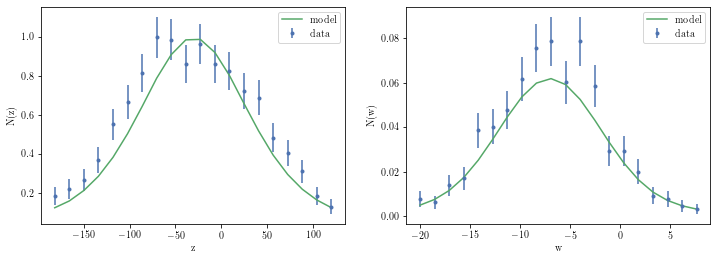

(51.60009219664631, 142.02357927126934)

In [8]:
print(theta.shape)
zmod = dddm.fz(zmid, theta)
wmod = dddm.fw(wmid, theta)

# plot
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].errorbar(zmid, znum, yerr=zerr, fmt='.', label='data')
ax[0].plot(zmid, zmod, label='model')
ax[0].set_xlabel('z')
ax[0].set_ylabel('N(z)')
ax[0].legend()
ax[1].errorbar(wmid, wnum, yerr=werr, fmt='.', label='data')
ax[1].plot(wmid, wmod, label='model')
ax[1].set_xlabel('w')
ax[1].set_ylabel('N(w)')
ax[1].legend()
plt.show()
dddm.log_prob(theta, zdata, wdata, locs, scales)

In [9]:
ndim = len(locs)+24
nwalkers = 2*ndim+2
ndim, nwalkers

(35, 72)

In [10]:
p0 = dddm.generate_p0(nwalkers, locs, scales, kind=2)
p0.shape

(72, 35)

In [11]:
p0_flat = p0.reshape(-1, ndim)
dddm.log_prob_par(p0_flat, zdata, wdata, locs, scales)

array([[ 4.34744695e+01, -1.03063859e+03, -9.87164117e+02],
       [ 4.26104693e+01, -3.75659042e+02, -3.33048573e+02],
       [ 3.51788396e+01, -7.05781212e+03, -7.02263328e+03],
       [ 4.46871218e+01, -5.39391214e+02, -4.94704092e+02],
       [ 4.43133628e+01, -2.28883902e+03, -2.24452566e+03],
       [ 4.05914353e+01, -1.42994828e+03, -1.38935685e+03],
       [ 3.80349543e+01, -1.47107161e+02, -1.09072206e+02],
       [ 4.22482920e+01, -2.63822829e+02, -2.21574537e+02],
       [ 3.54708842e+01, -2.31135246e+04, -2.30780537e+04],
       [ 4.19520926e+01, -1.03807731e+03, -9.96125221e+02],
       [ 4.46438530e+01, -2.10435484e+02, -1.65791632e+02],
       [ 3.53234881e+01, -4.22334990e+03, -4.18802641e+03],
       [ 4.15308345e+01, -1.01778666e+04, -1.01363357e+04],
       [ 4.14061593e+01, -8.59980916e+03, -8.55840300e+03],
       [ 4.33281224e+01, -2.73289913e+03, -2.68957101e+03],
       [ 4.08087694e+01, -8.17787330e+03, -8.13706453e+03],
       [ 4.09950456e+01, -1.61735344e+03

In [12]:
t0 = time()
chain = dddm.mcmc(500, nwalkers, p0, zdata, wdata, locs, scales, dz=1, verbose=True, parallel=True)
print(time() - t0, "s")
chain.shape

11.502993822097778 s


(500, 72, 35)

In [13]:
calculate_probs(dddm, chain, ndim, zdata, wdata, locs, scales, batch=100)

array([[   44.57174918,  -759.3396411 ,  -714.76789192],
       [   42.61046932,  -375.65904243,  -333.04857311],
       [   35.17883963, -7057.81211632, -7022.63327669],
       ...,
       [   45.5281166 ,   101.75112554,   147.27924215],
       [   46.14243919,    99.84962405,   145.99206324],
       [   40.5243795 ,    94.26271193,   134.78709144]])

In [28]:
def get_params(chain, indexes, labs):
    params = []
    dic = {key: value for key, value in zip(labs, indexes)}
    for l, i in dic.items():
        if l == 'rhob':
            params.append(chain[:, :, :i].sum(axis=2).T/1E-2)
        elif l == 'rhoDM':
            params.append(chain[:, :, i].T/1E-2)
        elif l == 'R':
            params.append(chain[:, :, i].T/1E-3)
        else:
            params.append(chain[:, :, i].T)
    params = np.array(params).T
    return params

100%|██████████| 12/12 [00:00<00:00, 19.37it/s]


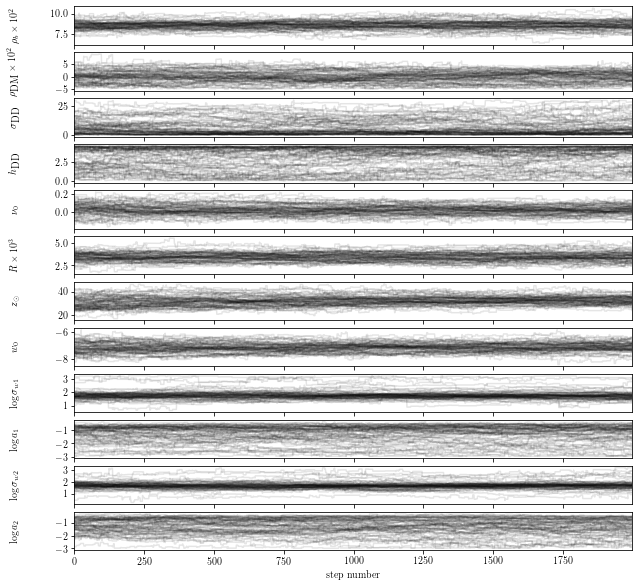

In [31]:
labels = [r'$\rho_b\times 10^2$', r'$\rho_{\textup{DM}}\times 10^2$', r"$\sigma_{\textup{DD}}$", r"$h_{\textup{DD}}$", r'$\nu_0$', r'$R\times 10^3$', r'$z_{\odot}$', r'$w_0$', r'$\log \sigma_{w1}$', r'$\log a_1$', r'$\log \sigma_{w2}$', r'$\log a_2$']
labs = ['rhob', 'rhoDM', 'sigmaDD', 'hDD', 'nu0', 'R', 'zsun', 'w0', 'log_sigmaw1', 'log_a1', 'log_sigmaw2', 'log_a2']
indexes = [12, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]

params = get_params(chain, indexes, labs)
plot_chain(params, labels, figsize=(10,10))

In [17]:
p0_next = chain[-1, :, :]
t0 = time()
chain = dddm.mcmc(2000, nwalkers, p0_next, zdata, wdata, locs, scales, dz=1, verbose=True, parallel=True)
print(time() - t0, "s")
chain.shape

32.21579337120056 s


(2000, 72, 35)

100%|██████████| 12/12 [00:00<00:00, 21.35it/s]


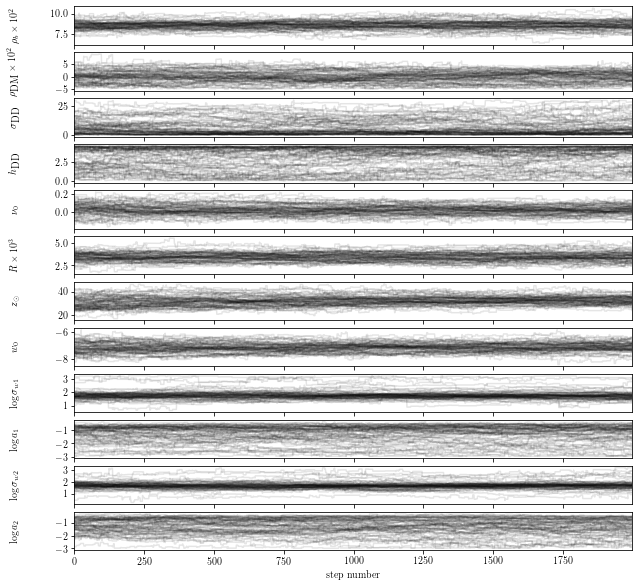

In [32]:
labels = [r'$\rho_b\times 10^2$', r'$\rho_{\textup{DM}}\times 10^2$', r"$\sigma_{\textup{DD}}$", r"$h_{\textup{DD}}$", r'$\nu_0$', r'$R\times 10^3$', r'$z_{\odot}$', r'$w_0$', r'$\log \sigma_{w1}$', r'$\log a_1$', r'$\log \sigma_{w2}$', r'$\log a_2$']
labs = ['rhob', 'rhoDM', 'sigmaDD', 'hDD', 'nu0', 'R', 'zsun', 'w0', 'log_sigmaw1', 'log_a1', 'log_sigmaw2', 'log_a2']
indexes = [12, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]

params = get_params(chain, indexes, labs)
plot_chain(params, labels, figsize=(10,10))

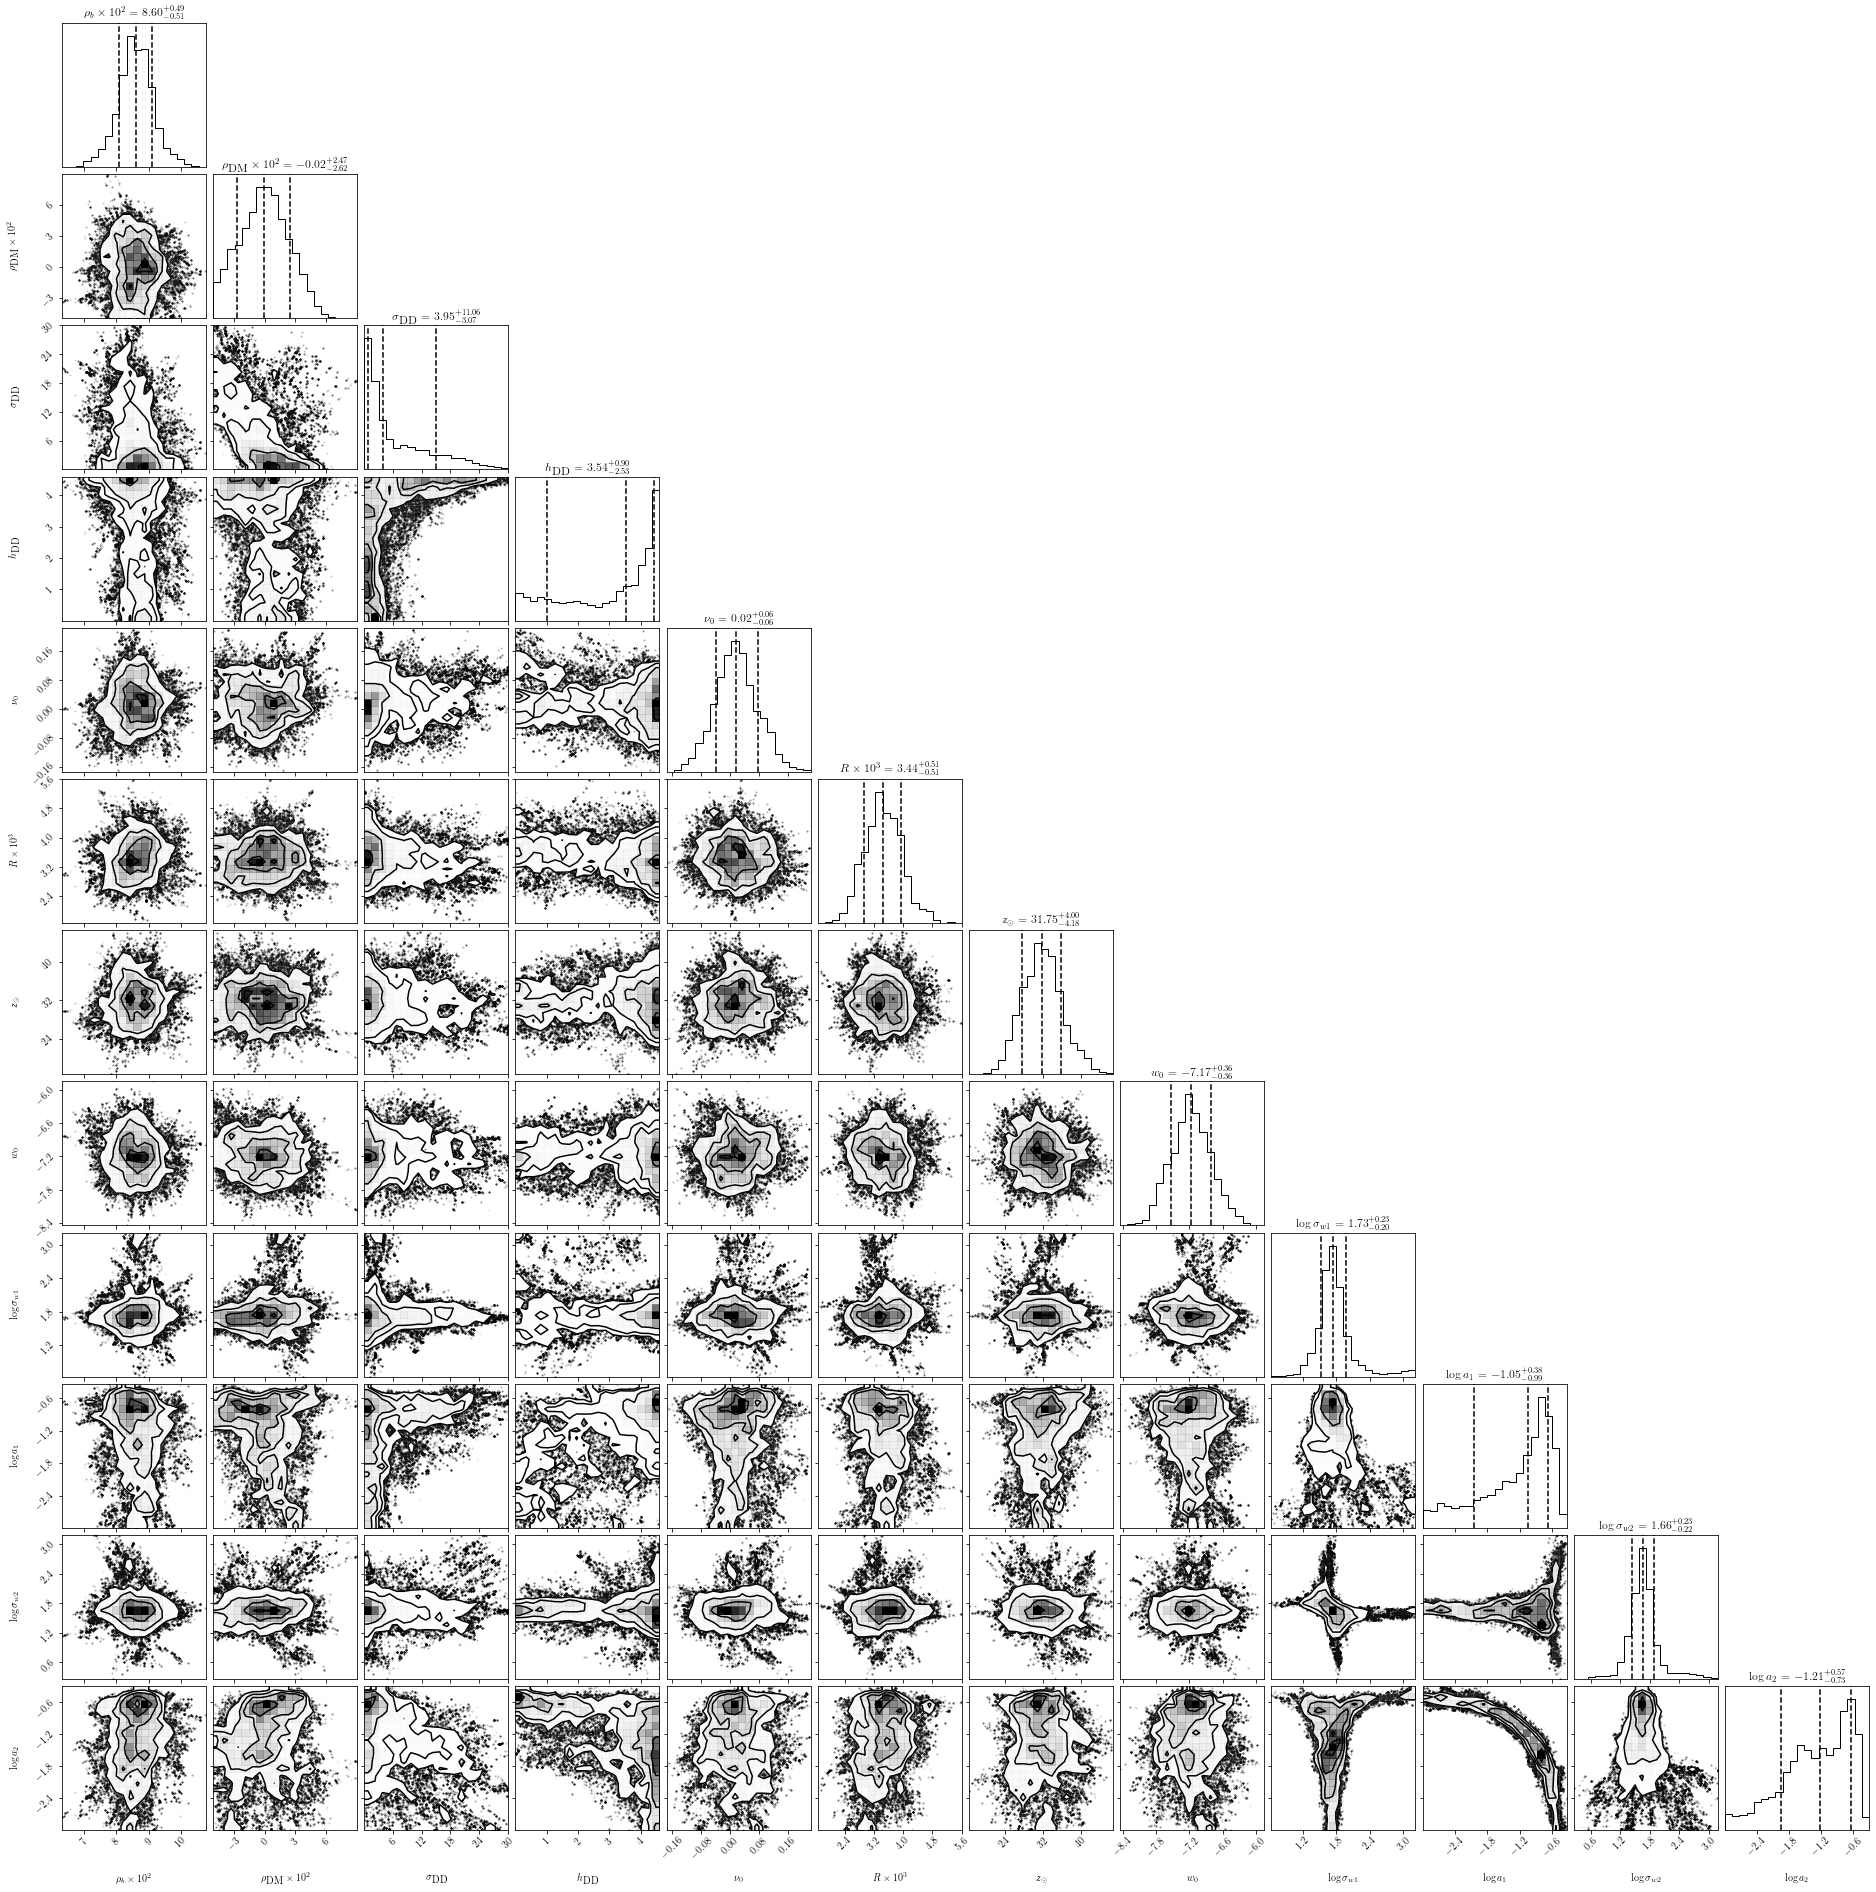

In [33]:
plot_corner(params, labels)

(144000, 35)


100%|██████████| 50000/50000 [01:10<00:00, 712.74it/s]


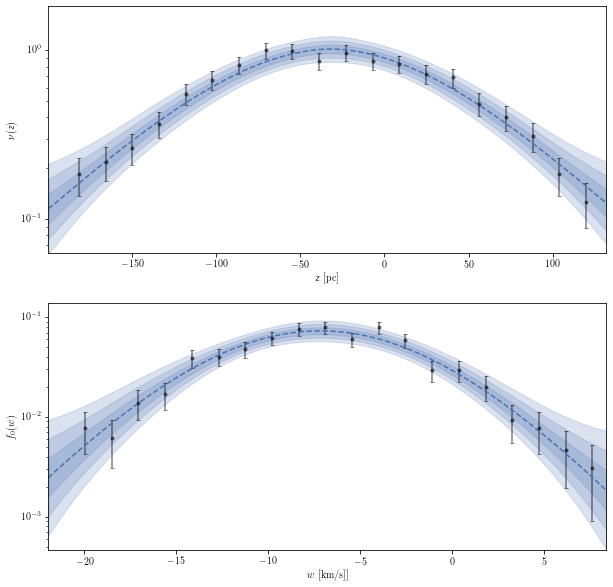

In [34]:
plot_fit(dddm, zdata, wdata, chain, ndim)

In [39]:
probs = calculate_probs(dddm, chain, ndim, zdata, wdata, locs, scales)

In [ ]:
prior = probs[:, 0]
likelihood = probs[:, 2]
posterior = probs[:, 1]
# plot histogram of probabilities
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].hist(prior, bins=100)
axes[0].set_xlabel('prior')
axes[1].hist(likelihood, bins=100)
axes[1].set_xlabel('likelihood')
axes[2].hist(posterior, bins=100)
axes[2].set_xlabel('posterior')
plt.show()
likelihood.max()

The script for comparing also implemented in `script` folder.